11493376/11490434 [==============================] - 0s 0us/step


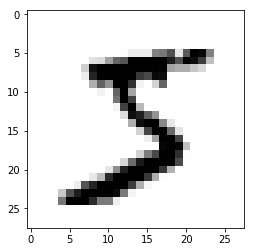

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

In [1]:
import tensorflow as tf
import numpy as np

mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)

plt.show()
print(y_train[0])
print(X_train[0])

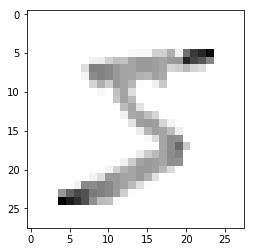

5


In [2]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

In [3]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss)
print(val_acc)
model.save('epic_num_reader.model')

Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2618 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1064 - acc: 0.9669
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0718 - acc: 0.9778
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0545 - acc: 0.9826
Epoch 5/5
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0898 - acc: 0.9742
0.08979326400047867
0.9742


In [4]:
new_model=tf.keras.models.load_model('epic_num_reader.model')
predictions=new_model.predict(X_test)
print(np.argmax(predictions[0]))

7


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,load_img
print(os.listdir("../input"))
import random

import pickle
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

# Any results you write to the current directory are saved as output.

['train', 'sampleSubmission.csv', 'test1']


Using TensorFlow backend.


In [6]:
filenames = os.listdir("../input/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
df.head()

,filename,category
0,cat.11679.jpg,0
1,dog.2811.jpg,1
2,dog.2578.jpg,1
3,dog.9238.jpg,1
4,dog.7504.jpg,1


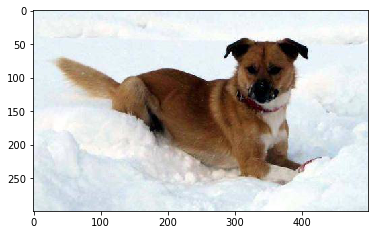

In [8]:
sample = random.choice(filenames)
image = load_img("../input/train/train/"+sample)
plt.imshow(image)

In [9]:
#DATADIR='PetImages/'
CATEGORIES=['Cat','Dog']
IMG_SIZE=100
training_data=[]
for each in df['filename'].iteritems():
    data_dir="../input/train/train"
    category = each[1].split('.')[0]
    if category == 'dog':
        class_num=1
    else:
        class_num=0
    img_array=cv2.imread(os.path.join(data_dir,each[1]),cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    training_data.append([new_array,class_num])
print(len(training_data))

25000


In [10]:
import random
random.shuffle(training_data)

In [11]:
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [12]:
#saving data
pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [13]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)
pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

In [14]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

Name='cats_vs_dogs_CNN-{}'.format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(Name))

X=X/255.0
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.2,callbacks=[tensorboard])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6854 - acc: 0.5617 - val_loss: 0.6777 - val_acc: 0.5772
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.6559 - acc: 0.6122 - val_loss: 0.6329 - val_acc: 0.6386
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.6343 - acc: 0.6456 - val_loss: 0.5993 - val_acc: 0.6810
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.5761 - acc: 0.7021 - val_loss: 0.5543 - val_acc: 0.7180
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.5332 - acc: 0.7344 - val_loss: 0.5268 - val_acc: 0.7418
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.5007 - acc: 0.7559 - val_loss: 0.5393 - val_acc: 0.7454
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.4806 - acc: 0.7666 - val_loss: 0.5

In [15]:
#!tensorboard --logdir=logs/
%reload_ext tensorboard.notebook
%tensorboard --logdir logs

In [16]:
#doing sort of grid search
dense_layers=[0,1,2]
layer_sizes=[32,64,128]
conv_layers=[1,2,3]

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X=X/255.0

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            Name="{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,conv_layer,int(time.time()))
            print(Name)
            tensorboard=TensorBoard(log_dir='logs/{}'.format(Name))

            
            model=Sequential()

            model.add(Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            
            for _ in range(dense_layer):
                    model.add(Dense(layer_size))
                    model.add(Activation('relu'))
                    
            model.add(Dense(1))
            model.add(Activation('sigmoid'))


            model.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

            model.fit(X,y,batch_size=32,epochs=10,validation_split=0.2,callbacks=[tensorboard])

1-conv-32-nodes-1-dense-1571997787
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 219us/sample - loss: 0.6006 - acc: 0.6723 - val_loss: 0.5500 - val_acc: 0.7302
Epoch 2/10
20000/20000 [==============================] - 4s 207us/sample - loss: 0.5207 - acc: 0.7452 - val_loss: 0.5464 - val_acc: 0.7238
Epoch 3/10
20000/20000 [==============================] - 4s 206us/sample - loss: 0.4708 - acc: 0.7753 - val_loss: 0.5209 - val_acc: 0.7466
Epoch 4/10
20000/20000 [==============================] - 4s 206us/sample - loss: 0.4320 - acc: 0.8025 - val_loss: 0.5320 - val_acc: 0.7450
Epoch 5/10
20000/20000 [==============================] - 4s 206us/sample - loss: 0.3991 - acc: 0.8220 - val_loss: 0.5350 - val_acc: 0.7494
Epoch 6/10
20000/20000 [==============================] - 4s 207us/sample - loss: 0.3686 - acc: 0.8388 - val_loss: 0.5574 - val_acc: 0.7356
Epoch 7/10
20000/20000 [==============================] - 4s 209us/sample - 

In [17]:
#prepraring final model

#dense_layers = [0]
#layer_sizes = [64]
#conv_layers = [3]


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1571999913
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 8s 448us/sample - loss: 0.6400 - acc: 0.6217 - val_loss: 0.6262 - val_acc: 0.6520
Epoch 2/10
17500/17500 [==============================] - 7s 388us/sample - loss: 0.5210 - acc: 0.7450 - val_loss: 0.4737 - val_acc: 0.7749
Epoch 3/10
17500/17500 [==============================] - 7s 388us/sample - loss: 0.4601 - acc: 0.7837 - val_loss: 0.4227 - val_acc: 0.8075
Epoch 4/10
17500/17500 [==============================] - 7s 390us/sample - loss: 0.4113 - acc: 0.8114 - val_loss: 0.4082 - val_acc: 0.8157
Epoch 5/10
17500/17500 [==============================] - 7s 391us/sample - loss: 0.3777 - acc: 0.8314 - val_loss: 0.3988 - val_acc: 0.8163
Epoch 6/10
17500/17500 [==============================] - 7s 389us/sample - loss: 0.3474 - acc: 0.8458 - val_loss: 0.3756 - val_acc: 0.8321
Epoch 7/10
17500/17500 [==============================] - 7s 411us/sample - 

In [18]:

CATEGORIES = ["Cat",'Dog']  # will use this to convert prediction num to string value


def prepare(file):
    filepath="../input/train/train/"+file
    print(filepath)
    IMG_SIZE = 100 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.
model=tf.keras.models.load_model('64x3-CNN.model')
#prediction=model.predict([prepare('cat.10632.jpg')])
prediction=model.predict([prepare('dog.8472.jpg')])
print(CATEGORIES[int(prediction[0][0])])

../input/train/train/dog.8472.jpg
Dog
